In [221]:
import random
import math
import statistics as st
import matplotlib.pyplot as plt
from collections import Counter
import seaborn

In [222]:
%matplotlib inline

In [134]:
def flip_coin(n=16):
    intervals = [2**i for i in range(pow+1)]
    flips = []
    old_int = 0
    flip_dict = {}
    for i in range(2**pow):
        flip = random.choice([0,1])
        flips.append(flip)
    for i in intervals:
        flip_dict[i] = Counter(flips[old_int:i+1])
        old_int = i+1
    sorted_by_int = sorted([(key, value) for key, value in flip_dict.items()])
    cleaned_counts = [(pair[0],pair[1][0],pair[1][1]) for pair in sorted_by_int]
    return cleaned_counts

In [136]:
trial1 = flip_coin()
print(trial1)

[(1, 2, 0), (2, 0, 1), (4, 0, 2), (8, 3, 1), (16, 4, 4), (32, 7, 9), (64, 13, 19), (128, 34, 30), (256, 67, 61), (512, 131, 125), (1024, 275, 237), (2048, 506, 518), (4096, 1049, 999), (8192, 2076, 2020), (16384, 4068, 4124), (32768, 8260, 8124), (65536, 16354, 16413)]


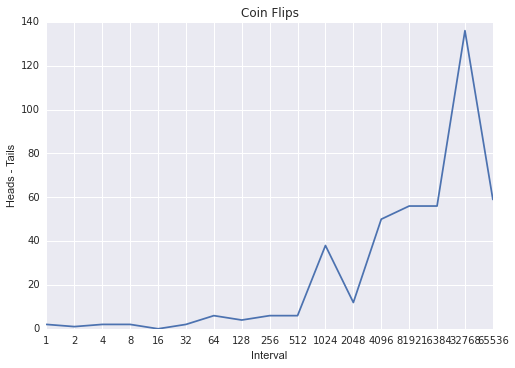

In [233]:
x1 = [i[0] for i in trial1]
y1 = [abs(i[1] - i[2]) for i in trial1]
plt.plot(y1)
plt.xticks(range(17), x1)
plt.xlabel("Interval")
plt.ylabel("Heads - Tails")
plt.title("Coin Flips")
plt.style.use('bmh')
plt.show()

In [143]:
def get_ratios(flips):
    ratios = []
    for i in flips:
        if i[2] != 0:
            ratio = i[1] / i[2]
            ratios.append(ratio)
        else:
            ratios.append(0)
    return ratios

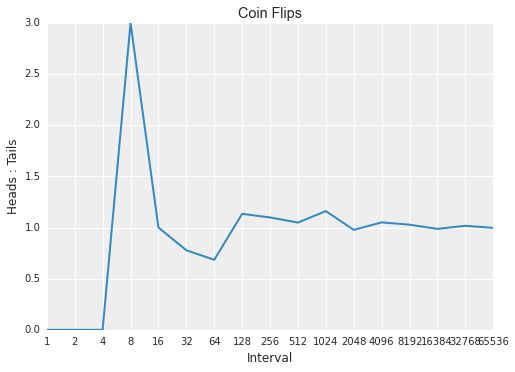

In [234]:
x1 = [i[0] for i in trial1]
y1 = get_ratios(trial1)
plt.plot(y1)
plt.xticks(range(17), x1)
plt.xlabel("Interval")
plt.ylabel("Heads : Tails")
plt.title("Coin Flips")
plt.style.use('bmh')
plt.show()

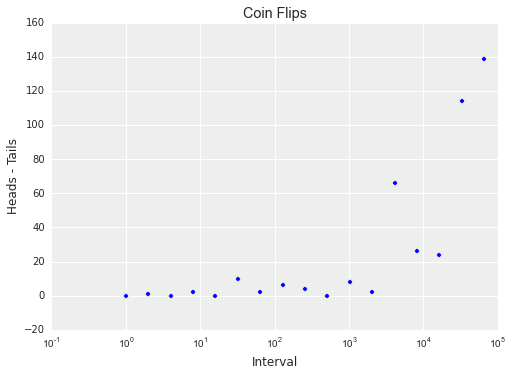

In [235]:
x = [i[0] for i in cleaned_counts]
y = [abs(i[1] - i[2]) for i in cleaned_counts]
plt.scatter(x, y)
plt.xscale('log')
plt.xlabel("Interval")
plt.ylabel("Heads - Tails")
plt.title("Coin Flips")
plt.style.use('bmh')
plt.show()

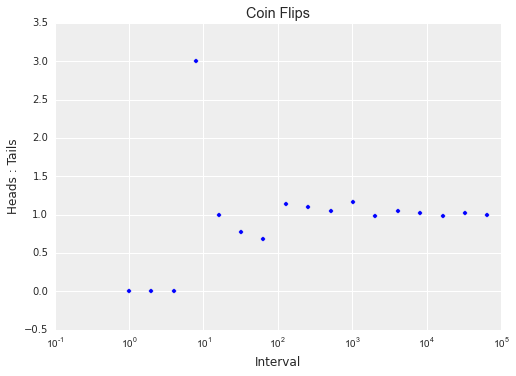

In [236]:
x = [i[0] for i in trial1]
y = get_ratios(trial1)
plt.scatter(x, y)
plt.xscale('log')
plt.xlabel("Interval")
plt.ylabel("Heads : Tails")
plt.title("Coin Flips")
plt.style.use('bmh')
plt.show()

It's definitely easier to ignore outliers when looking at a scatterplot.<br />
The differences between heads and tails is very small the fewer the rolls.<br />
The more rolls there are, the more opportunity there is to have a very big difference in a particular interval, but it always seems to regulate itself.<br />
The ratios seem to level out the more rolls there are.

In [159]:
flips_list = [flip_coin() for i in range(20)]
means = []
for sim in flips_list:
    ratios = get_ratios(sim)
    mean = st.mean(ratios)
    means.append(mean)

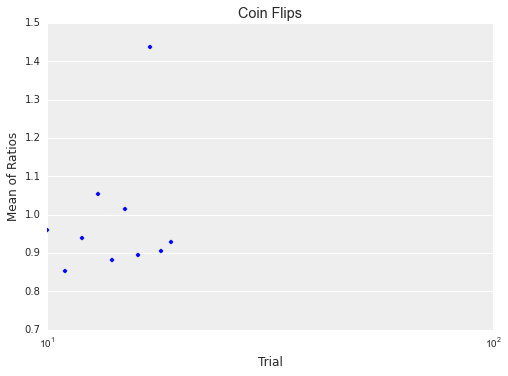

In [237]:
x = [i for i in range(20)]
y = means
plt.scatter(x, y)
plt.xscale('log')
plt.xlabel("Trial")
plt.ylabel("Mean of Ratios")
plt.title("Coin Flips")
plt.style.use('bmh')
plt.show()

In [161]:
stdvs = []
for sim in flips_list:
    ratios = get_ratios(sim)
    stdv = st.stdev(ratios)
    stdvs.append(stdv)

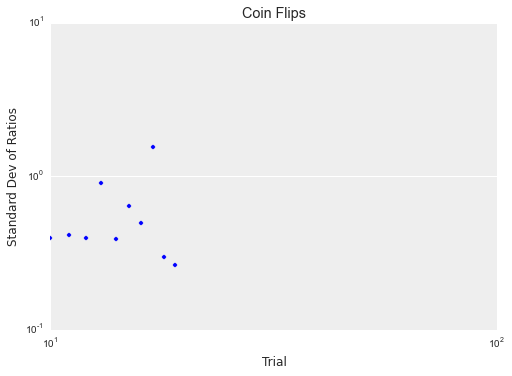

In [238]:
x = [i for i in range(20)]
y = stdvs
plt.scatter(x, y)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Trial")
plt.ylabel("Standard Dev of Ratios")
plt.title("Coin Flips")
plt.style.use('bmh')
plt.show()

These plots don't seem to be extremely telling of any sort of trend.<br />
It might be more informative with larger trials.

In [169]:
def flip_coin_ntimes(n = 100):
    flips = []
    flip_dict = {}
    for i in range(n):
        flip = random.choice([0,1])
        flips.append(flip)
    flip_dict = Counter(flips)
    return flip_dict

In [245]:
hundred_flips_list = [flip_coin_ntimes(100) for i in range(100000)]
ratios2 = []
for sim in hundred_flips_list:
    ratio = sim[0] / 100
    ratios2.append(ratio)

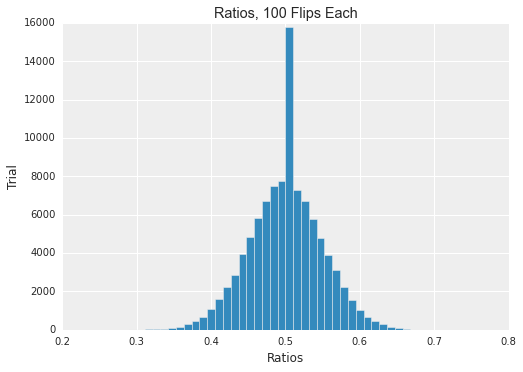

In [246]:
plt.hist(ratios2, bins=40)
plt.xlabel("Ratios")
plt.ylabel("Trial")
plt.title("Ratios, 100 Flips Each")
plt.style.use('bmh')
plt.show()

In [248]:
thousand_flips_list = [flip_coin_ntimes(1000) for i in range(100000)]
ratios3 = []
for sim in thousand_flips_list:
    ratio = sim[0] / 1000
    ratios3.append(ratio)

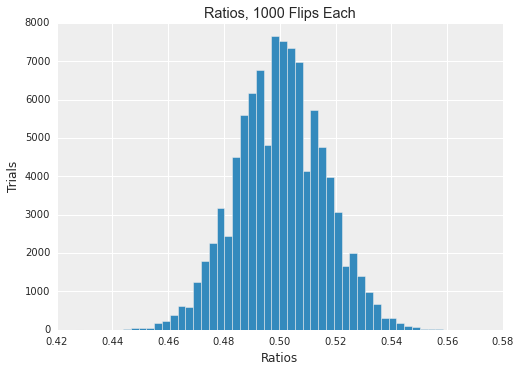

In [249]:
plt.hist(ratios3, bins=50)
plt.xlabel("Ratios")
plt.ylabel("Trials")
plt.title("Ratios, 1000 Flips Each")
plt.style.use('bmh')
plt.show()

In [250]:
mean2 = round(st.mean(ratios2), 4)
stdev2 = round(st.stdev(ratios2), 3)
mean3 = round(st.mean(ratios3), 5)
stdev3 = round(st.stdev(ratios3), 5)

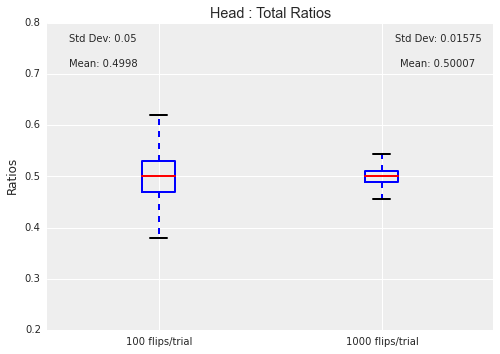

In [251]:
plt.boxplot([ratios2, ratios3])
plt.title("Head : Total Ratios")
plt.ylabel("Ratios")
plt.xticks(range(1,3), ["100 flips/trial", "1000 flips/trial"])
plt.text(0.75, 0.77,'Std Dev: {}'.format(stdev2),
     horizontalalignment='center',
     verticalalignment='center')
plt.text(0.75, 0.72,'Mean: {}'.format(mean2),
     horizontalalignment='center',
     verticalalignment='center')
plt.text(2.25, .77,'Std Dev: {}'.format(stdev3),
     horizontalalignment='center',
     verticalalignment='center')
plt.text(2.25, 0.72,'Mean: {}'.format(mean3),
     horizontalalignment='center',
     verticalalignment='center')
plt.style.use('bmh')
plt.show()

As expected, the larger the sample size, the tighter the distribution of ratios is around .5